# Texto en Tablas

En este notebook exploraremos algunas visualizaciones donde el texto es protagonista a través del dataset [guaguas](https://github.com/rivaquiroga/guaguas) preparado por [Riva Quiroga](https://twitter.com/rivaquiroga). Algunos de los análisis están inspirados en los ejemplos que ella incluyó en el repositorio de guaguas.

In [1]:
from dotenv import load_dotenv
import os
import sys
from pathlib import Path
from aves.config import setup_style

load_dotenv()
setup_style(dpi=100)

AVES_ROOT = Path(os.environ['AVES_ROOT'])
GUAGUAS_PATH = AVES_ROOT / "data" / "external" / "guaguas"
GUAGUAS_PATH

PosixPath('/home/egraells/resources/aves/data/external/guaguas')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from aves.features.utils import normalize_rows

import matplotlib as mpl
import seaborn as sns

In [3]:
guaguas = pd.read_csv(GUAGUAS_PATH / '1920-2021.csv.gz')
guaguas.head()

,anio,nombre,sexo,n,proporcion
0,1920,Aaron,M,1,0.000049
1,1920,Abdolina,F,1,0.000049
2,1920,Abdon,M,1,0.000049
3,1920,Abdón,M,2,0.000098
4,1920,Abel,M,11,0.000540


In [4]:
guaguas.sample(20)

,anio,nombre,sexo,n,proporcion
121661,1946,Mardoqueo,M,1,0.000006
128401,1947,Octavia,F,4,0.000023
799587,2017,Vannessa,F,1,0.000005
287939,1969,Jacquelinne,F,32,0.000112
85810,1940,Hermelisa,F,1,0.000008
472529,1989,Polletts,F,1,0.000003
635143,2003,Yemil,F,1,0.000004
233280,1962,Primavel,M,1,0.000004
162288,1953,Djalma,M,1,0.000004
390898,1981,Jeammy,F,1,0.000003


In [5]:
total_n = guaguas.groupby("nombre")["n"].sum().sort_values(ascending=False)
total_n.head(15)

nombre
María        961020
José         588613
Juan         581513
Luis         505794
Carlos       293719
Jorge        239083
Manuel       207620
Ana          203069
Rosa         199307
Francisco    182168
Víctor       173733
Pedro        161549
Cristian     160292
Héctor       145641
Sergio       144256
Name: n, dtype: int64

In [6]:
total_n

nombre
María          961020
José           588613
Juan           581513
Luis           505794
Carlos         293719
                ...  
Idiomelina          1
Idiomelinda         1
Idiomere            1
Idiomira            1
Üllmen              1
Name: n, Length: 195841, dtype: int64

In [7]:
total_n.sum()

22129100

In [8]:
total_n[total_n > 10000]

nombre
María       961020
José        588613
Juan        581513
Luis        505794
Carlos      293719
             ...  
Walter       10155
Marjorie     10155
Elvira       10146
Krishna      10073
Guido        10036
Name: n, Length: 357, dtype: int64

<Axes: ylabel='Frequency'>

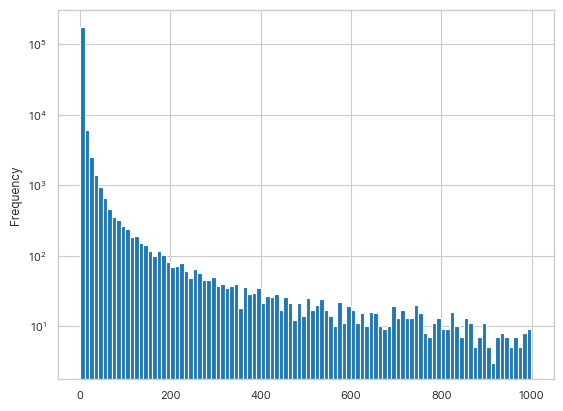

In [9]:
total_n[total_n < 1000].plot(kind='hist', bins=100, logy=True)

<Axes: ylabel='Frequency'>

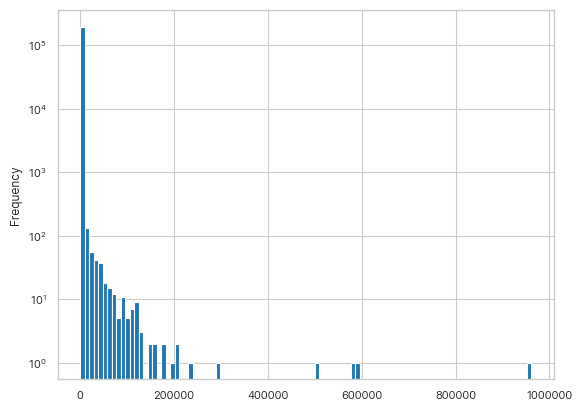

In [10]:
total_n.plot(kind='hist', bins=100, logy=True)

In [11]:
total_n.cumsum()

nombre
María            961020
José            1549633
Juan            2131146
Luis            2636940
Carlos          2930659
                 ...   
Idiomelina     22129096
Idiomelinda    22129097
Idiomere       22129098
Idiomira       22129099
Üllmen         22129100
Name: n, Length: 195841, dtype: int64

In [12]:
cumsum_names = total_n.cumsum() / total_n.sum()
cumsum_names

nombre
María          0.043428
José           0.070027
Juan           0.096305
Luis           0.119162
Carlos         0.132435
                 ...   
Idiomelina     1.000000
Idiomelinda    1.000000
Idiomere       1.000000
Idiomira       1.000000
Üllmen         1.000000
Name: n, Length: 195841, dtype: float64

<Axes: >

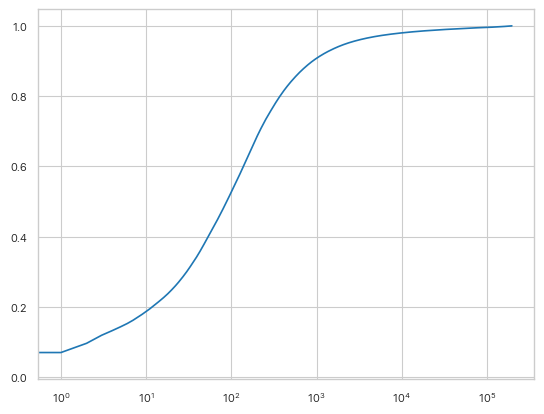

In [13]:
cumsum_names.reset_index(drop=True).plot(logx=True)

In [14]:
total_n[cumsum_names < 0.90].index

Index(['María', 'José', 'Juan', 'Luis', 'Carlos', 'Jorge', 'Manuel', 'Ana',
       'Rosa', 'Francisco',
       ...
       'Isadora', 'Eleazar', 'Noah', 'Salomé', 'Matheo', 'Yennifer',
       'Herminio', 'Frank', 'Yoselyn', 'Dennis'],
      dtype='object', name='nombre', length=901)

## ¿Hay tendencias temporales en los nombres?

In [15]:
tabla_anual = (
    guaguas[guaguas["nombre"].isin(total_n[cumsum_names < 0.90].index)]
    .groupby(["anio", "nombre"])["n"]
    .sum()
    .unstack(fill_value=0)
)
#tabla_anual.columns = list(tabla_anual.columns)
tabla_anual


nombre,Aaron,Aarón,Abel,Abelardo,Abigail,Abraham,Ada,Adela,Adelaida,Adelina,...,Yoselyn,Yuliana,Zaida,Zoila,Zulema,Zunilda,Álvaro,Ámbar,Ítalo,Úrsula
anio,,,,,,,,,,,,,,,,,,,,,
1920,1,0,11,10,1,15,10,28,14,13,...,0,0,3,31,17,19,4,0,1,2
1921,0,0,44,18,4,44,8,71,22,26,...,0,0,5,90,59,42,15,0,3,3
1922,0,0,45,28,3,41,12,60,26,43,...,0,0,7,77,62,37,16,0,6,6
1923,0,0,34,27,3,63,15,82,30,38,...,0,0,7,84,68,53,14,1,4,4
1924,2,0,40,29,3,48,21,88,37,34,...,0,0,19,94,61,61,23,0,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,211,200,31,0,282,181,15,39,2,1,...,3,47,2,0,3,0,266,454,0,8
2018,176,201,36,0,300,193,10,48,1,0,...,0,51,6,1,3,1,265,690,4,14
2019,149,221,58,2,264,181,8,52,0,1,...,1,44,3,0,3,0,198,734,5,6


<Axes: xlabel='anio', ylabel='nombre'>

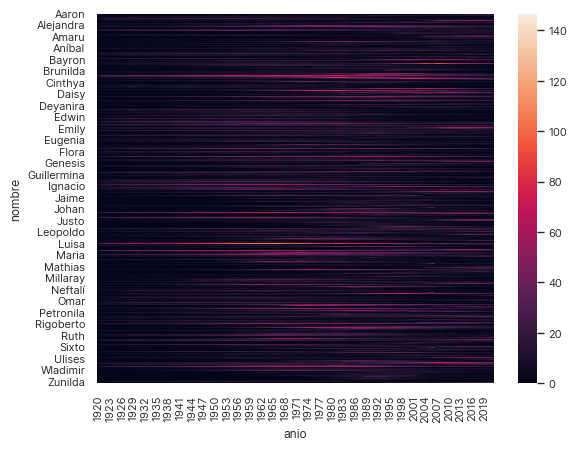

In [16]:
sns.heatmap(tabla_anual.T.pipe(np.sqrt))

<Axes: xlabel='anio', ylabel='nombre'>

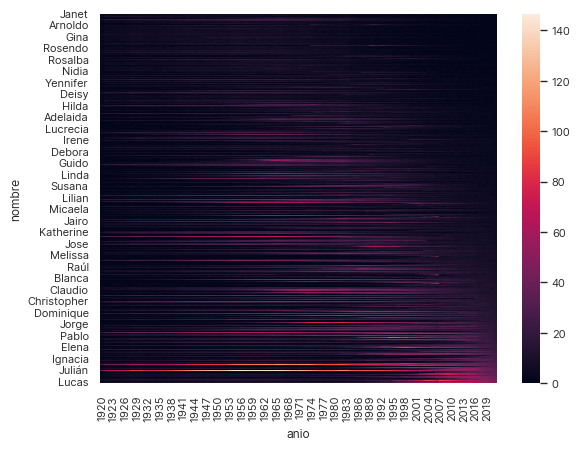

In [17]:
sns.heatmap(tabla_anual.pipe(np.sqrt).T.sort_values(2021))

In [18]:
from aves.features.utils import tfidf, normalize_rows, logodds_ratio_with_uninformative_dirichlet_prior

In [19]:
tabla_anual.pipe(logodds_ratio_with_uninformative_dirichlet_prior)

nombre,Aaron,Aarón,Abel,Abelardo,Abigail,Abraham,Ada,Adela,Adelaida,Adelina,...,Yoselyn,Yuliana,Zaida,Zoila,Zulema,Zunilda,Álvaro,Ámbar,Ítalo,Úrsula
1920,-1.790866,-0.098257,1.034560,3.699682,-1.920588,1.002613,2.905469,6.110711,5.853743,3.851070,...,-0.097439,-0.099110,0.894825,8.715432,4.487917,4.819616,-4.498330,-0.112574,-1.611131,-0.309510
1921,-0.118273,-0.106514,5.799528,3.960839,-2.718635,3.388858,-0.366176,10.625497,5.593652,4.778159,...,-0.105696,-0.107367,0.453563,17.128933,11.583632,6.965260,-6.787135,-0.120831,-2.316861,-1.105956
1922,-0.118780,-0.107021,5.676568,7.009386,-2.940835,2.494373,0.782233,8.073284,6.674328,9.110262,...,-0.106203,-0.107874,1.293810,14.039153,11.866719,5.458949,-6.954181,-0.121338,-1.701375,0.011467
1923,-0.119212,-0.107453,3.047147,6.470812,-3.015639,6.162832,1.572713,11.874768,7.716335,7.538141,...,-0.106635,-0.108306,1.179729,15.064227,12.832796,8.835716,-7.166821,-2.966337,-2.287213,-0.888788
1924,-2.978342,-0.108343,3.772318,6.613372,-3.169748,2.877991,2.997313,12.132003,9.303370,5.965159,...,-0.107525,-0.109196,5.909662,16.164200,10.616831,9.883794,-7.229432,-0.122660,-2.633558,1.590378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,17.626916,32.593150,-5.612416,-0.127043,23.057042,5.376392,-3.996760,-5.430885,-3.876315,-3.857779,...,-3.103591,5.499801,-3.178952,-0.134402,-5.207334,-0.134106,-6.577337,36.616231,-0.131818,-3.362365
2018,13.856606,32.904079,-5.074714,-0.126921,25.050782,6.615271,-4.511102,-4.496531,-3.422627,-0.130565,...,-0.120916,6.399240,-2.778904,-4.217334,-5.186266,-4.187794,-6.428975,56.068603,-5.142645,-2.301042
2019,11.491543,36.704092,-2.305859,-3.850937,22.464430,6.397704,-4.486037,-3.638227,-0.125695,-3.781360,...,-2.815817,5.384861,-3.057517,-0.133637,-5.074991,-0.133342,-8.776451,61.075149,-5.106349,-3.431627
2020,12.538583,33.541945,-3.091181,-0.125308,23.586861,5.960058,-3.472164,-4.031670,-3.593675,-4.229449,...,-2.803359,1.470342,-2.585461,-0.132667,-5.080267,-0.132372,-8.352206,58.610382,-4.389607,-2.108860


<Axes: xlabel='anio'>

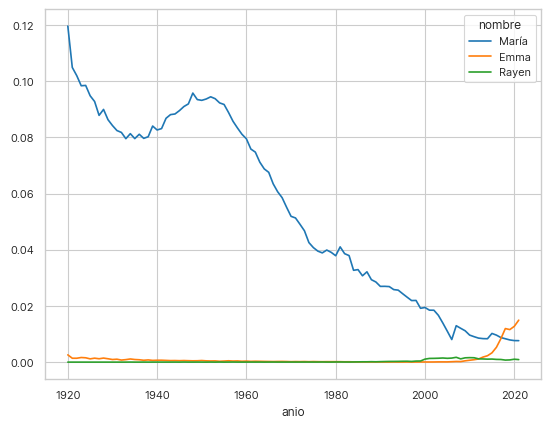

In [20]:
tabla_anual.pipe(tfidf)[['María', 'Emma', 'Rayen']].plot()

<Axes: xlabel='anio', ylabel='nombre'>

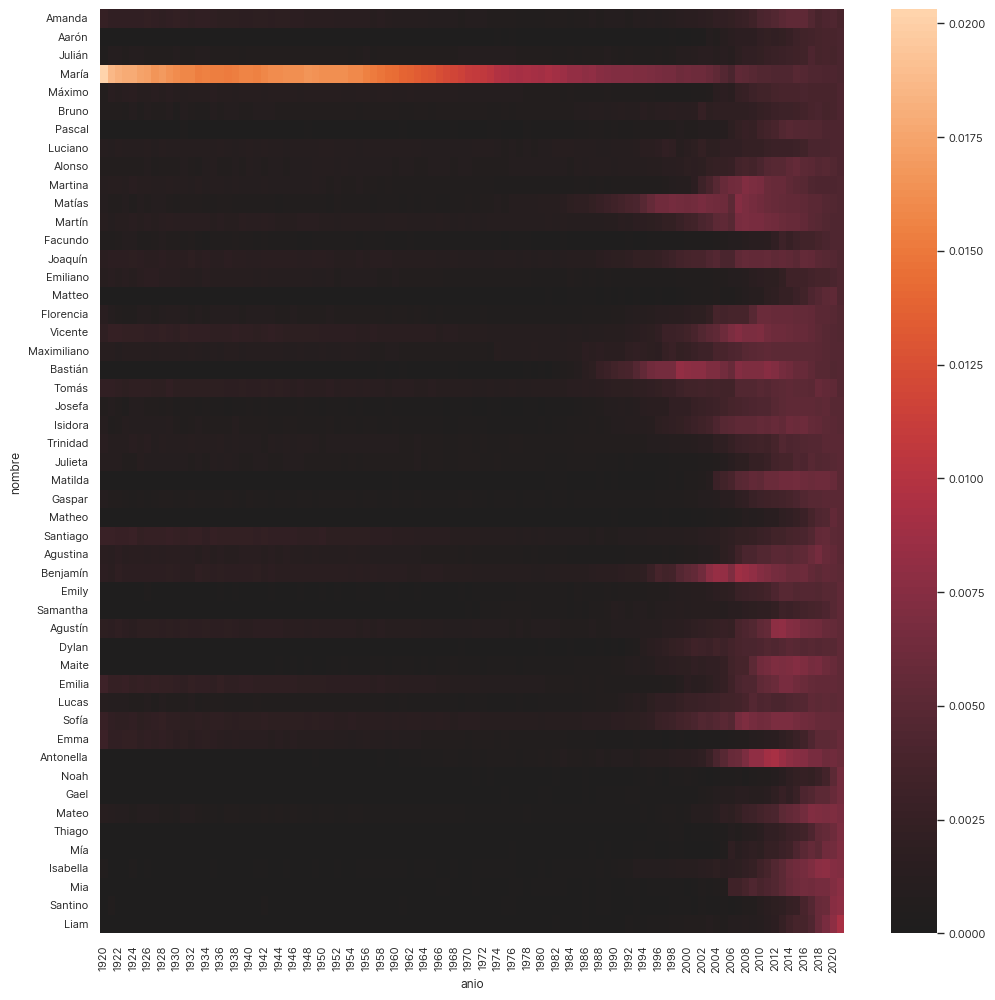

In [21]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(tabla_anual.pipe(np.sqrt).pipe(tfidf).T.sort_values(2021).tail(50), center=0, yticklabels=True, ax=ax)

<Axes: ylabel='nombre'>

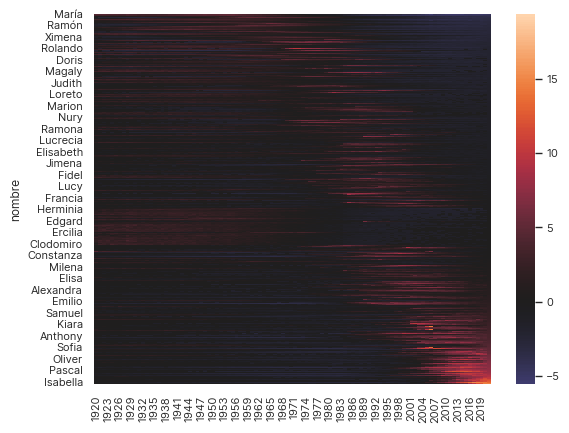

In [22]:
sns.heatmap(tabla_anual.pipe(np.sqrt).pipe(logodds_ratio_with_uninformative_dirichlet_prior).T.sort_values(2021), center=0, cmap='icefire')

<Axes: >

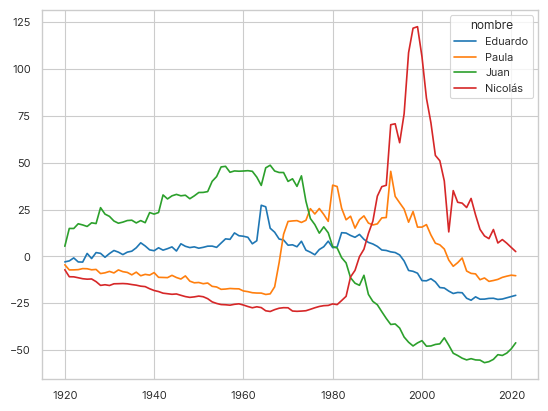

In [23]:
tabla_anual.pipe(logodds_ratio_with_uninformative_dirichlet_prior)[['Eduardo', 'Paula', 'Juan', 'Nicolás']].plot()

In [24]:
# tabla_anual.pipe(np.sqrt).pipe(
#     logodds_ratio_with_uninformative_dirichlet_prior
# ).unstack().sort_values(ascending=False).head(20)

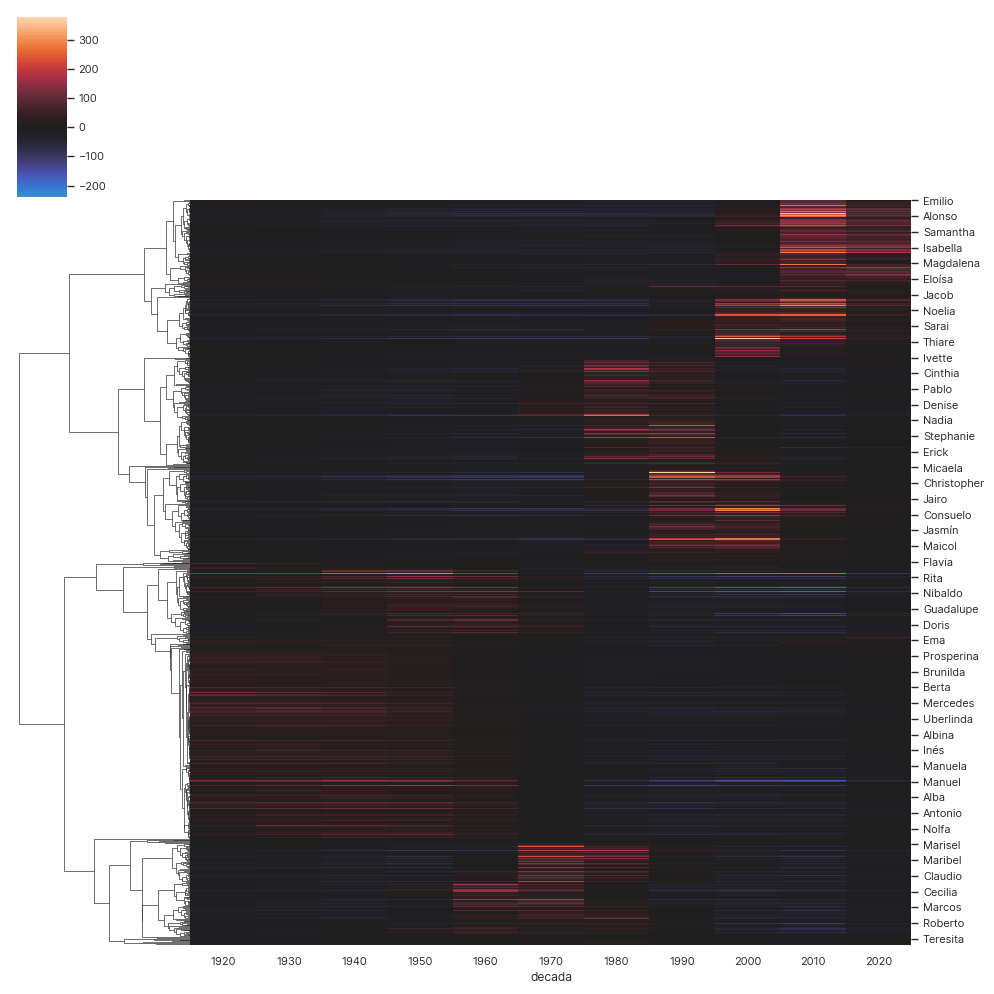

In [25]:
tabla_decadas = (
    tabla_anual.stack()
    .rename("frecuencia")
    .reset_index()
    .assign(decada=lambda x: x["anio"] - (x["anio"] % 10))
    .groupby(["nombre", "decada"])["frecuencia"]
    .sum()
    .unstack()
    .pipe(logodds_ratio_with_uninformative_dirichlet_prior)
)

tabla_decadas
g = sns.clustermap(tabla_decadas, center=0, col_cluster=False, metric='cosine')

In [26]:
g

Nesthar I
Nicolita I
Reipeng I
Pequeña I
Scherezad I
Ezperanza I
Europita I
Jeycoff I
Lefküruf I
Heliany I


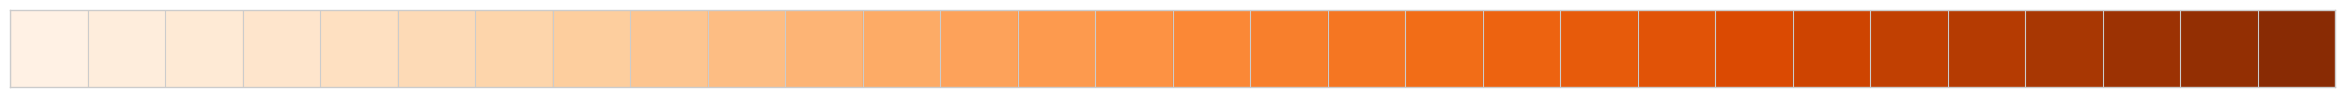

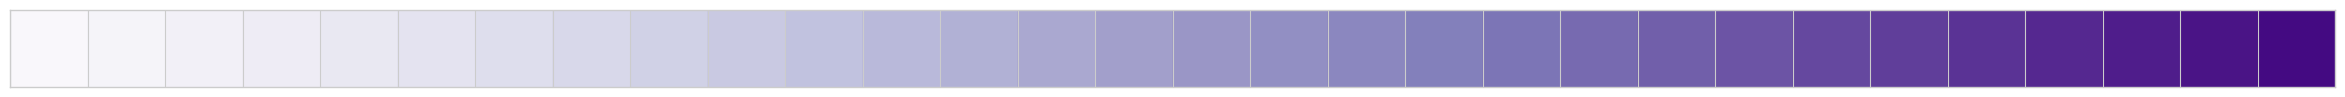

In [27]:
from aves.visualization.tables.areas import streamgraph
from matplotlib.colors import rgb2hex

n_name_bins = 30

name_bin = pd.cut(np.log(total_n), n_name_bins, labels=False)

m_colors = list(map(rgb2hex, sns.color_palette("Oranges", n_colors=n_name_bins)))
f_colors = list(map(rgb2hex, sns.color_palette("Purples", n_colors=n_name_bins)))

name_to_color = (
    guaguas.groupby(["nombre", "sexo"])["n"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .drop_duplicates(subset=["nombre"])
    .set_index("nombre")["sexo"]
    .to_dict()
)

for k, v in name_to_color.items():
    if v == "M":
        name_to_color[k] = m_colors[name_bin[k]]
    elif v == "F":
        name_to_color[k] = f_colors[name_bin[k]]
    else:
        # caso especial!
        print(k, v)
        name_to_color[k] = '#efefef'


sns.palplot(m_colors)
sns.palplot(f_colors)
# name_to_color

In [28]:
g.data2d

decada,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
Emilio,10.093905,6.453211,1.893244,-10.151114,-25.120878,-26.320621,-20.743094,-24.641768,2.385576,93.865457,17.981481
Matilde,26.193459,21.093859,15.073710,1.185971,-18.570466,-31.005791,-37.216056,-34.530035,1.374426,92.374662,31.998393
Rafaella,-0.139928,-0.144422,-0.150307,-0.154668,-0.157608,-11.027593,-17.393295,-18.297055,2.144763,93.682512,50.498511
Aylen,-0.132102,-0.136596,-5.036116,-0.146841,-8.750373,-10.898128,-12.333837,-10.763645,2.129878,61.955973,34.963755
Pascal,-0.146906,-5.929373,-6.517875,-0.161646,-12.603948,-17.857585,-24.756386,-26.092692,3.160156,133.840175,61.876776
...,...,...,...,...,...,...,...,...,...,...,...
Adrián,6.304389,4.583924,2.777912,-1.439757,-1.467582,5.921577,11.208538,12.053012,-20.954951,-16.550946,2.420057
Salomón,2.767472,1.798332,1.028399,-0.221050,2.644982,-1.818157,1.971677,3.413017,-4.826528,-5.542721,0.752312
Perla,4.159659,2.181709,1.086581,-0.099135,-1.959510,-3.698061,10.411791,2.129232,-1.182803,-9.119075,-3.965447
Arnaldo,5.946276,11.780446,15.402013,6.152391,-3.837863,-0.882270,24.962836,-10.831253,-16.179731,-15.036741,-5.905305


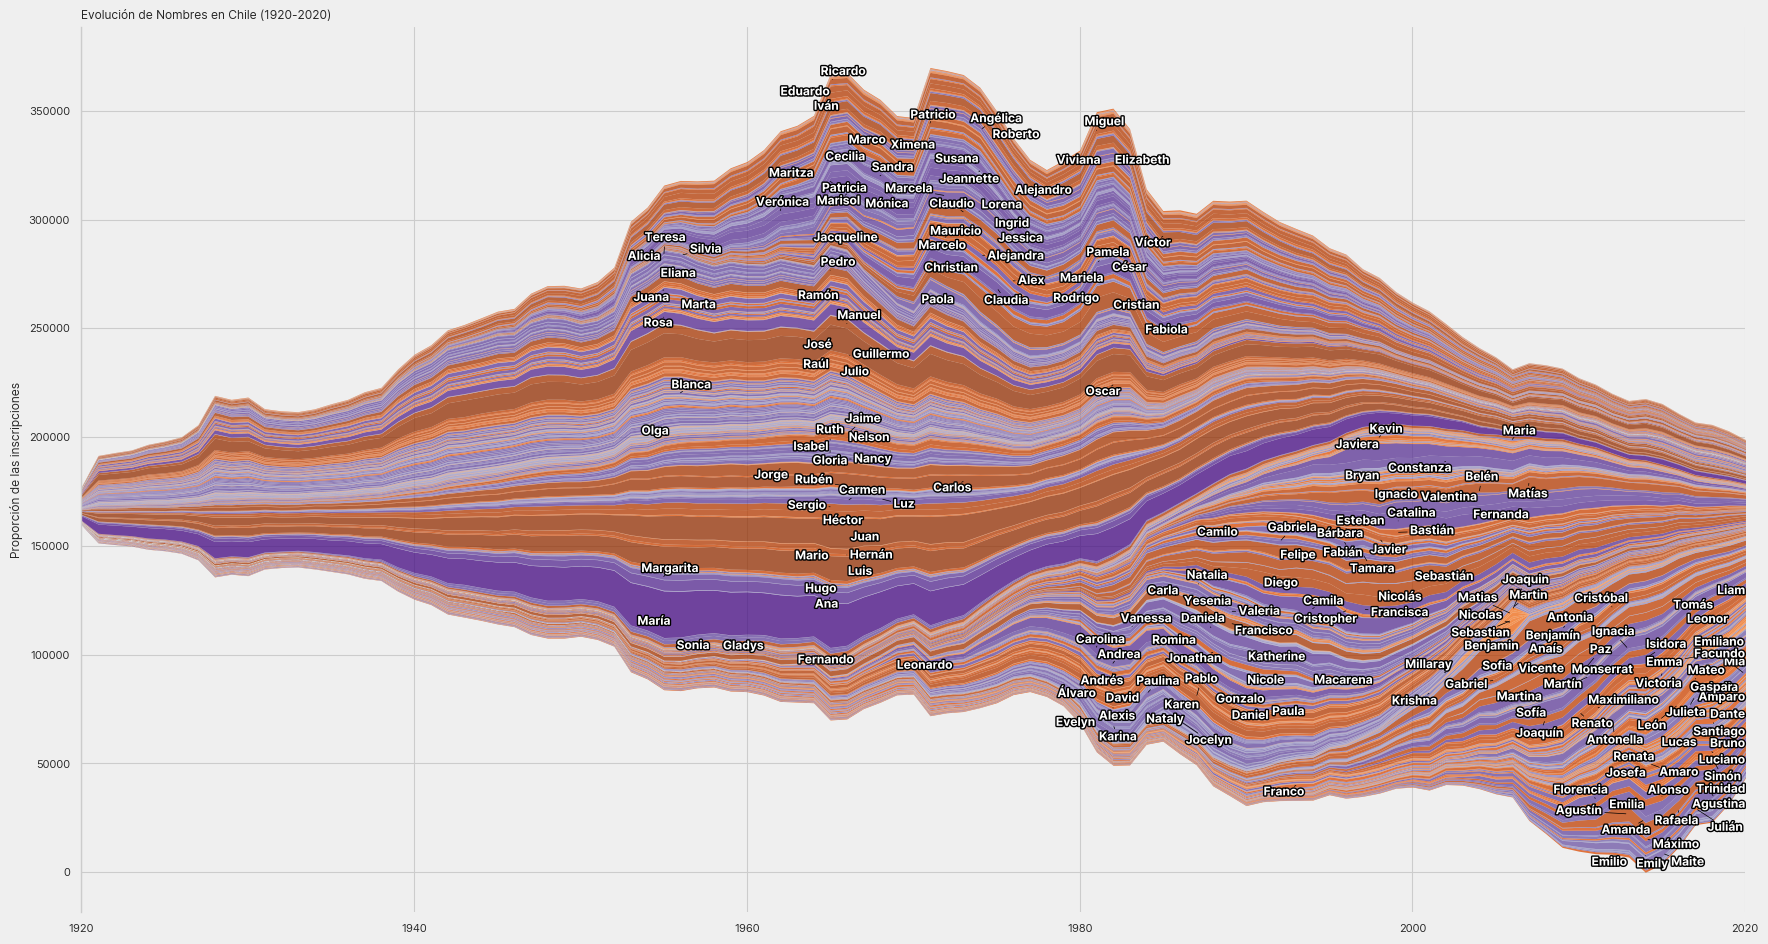

In [29]:
fig, ax = plt.subplots(figsize=(18, 9.5))

fig.set_facecolor("#efefef")
ax.set_facecolor("#efefef")
ax.set_xlim([1920, 2020])
#ax.set_ylim([0, 1])
ax.set_title("Evolución de Nombres en Chile (1920-2020)", loc="left")
ax.set_ylabel("Proporción de las inscripciones")
ax.set_xlabel("")

streamgraph(
    ax,
    tabla_anual[g.data2d.index].fillna(0),
    fig=fig,
    area_colors=name_to_color,
    baseline="wiggle",
    labels=True,
    label_threshold=1000,
    avoid_label_collisions=True,
    area_args=dict(linewidth=0.01, alpha=0.75),
)


sns.despine(ax=ax, bottom=True, top=True)

## ¿Existen tendencias asociadas a fenómenos históricos o _pop_?

In [30]:
tabla_completa = (
    guaguas
    .groupby(["anio", "nombre"])["n"]
    .sum()
    .unstack(fill_value=0)
)

tabla_completa

nombre,'Akurenga,'Amakihi,'Annia,'Ihan,'Ohana,'Onei,'Ua,'Ura,A,A'-Iong,...,Ózman,Ömer,Özlem,Úrsula,Úrzula,Übbe,Ügmi,Ül,Ülkuyen,Üllmen
anio,,,,,,,,,,,,,,,,,,,,,
1920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
1921,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
1922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,6,0,0,0,0,0,0
1923,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,0,0,0,0,0
1924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,11,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,1,0,0,0,0,0,0,0,0,0,...,0,0,1,8,0,0,0,0,0,0
2018,0,0,0,1,0,0,1,0,0,0,...,1,0,0,14,0,0,1,0,0,0
2019,0,1,0,0,1,0,0,0,0,0,...,0,0,0,6,0,0,0,0,0,0


Text(0.0, 1.0, 'Uso de los nombres Salvador y Augusto')

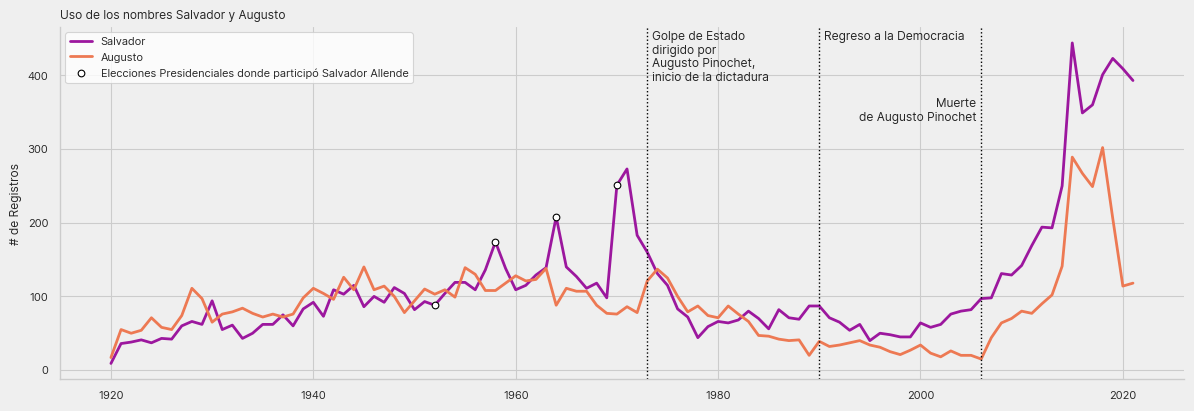

In [31]:
def plot_nameseries(names):

    fig, ax = plt.subplots(figsize=(12, 4))

    names.plot(
        ax=ax,
        color=sns.color_palette("plasma", n_colors=len(names.columns)),
        linewidth=2,
    )

    fig.set_facecolor("#efefef")
    ax.set_facecolor("#efefef")
    sns.despine(ax=ax)

    ax.set_xlabel("")
    ax.set_ylabel("# de Registros")

    fig.tight_layout()

    return fig, ax


fig, ax = plot_nameseries(tabla_completa[["Salvador", "Augusto"]])

ax.axvline(1973, linestyle="dotted", linewidth=1, color="black")
ax.annotate(
    "Golpe de Estado\ndirigido por\nAugusto Pinochet,\ninicio de la dictadura",
    xy=(1973.5, 0.99),
    xycoords=("data", "axes fraction"),
    ha="left",
    va="top",
)

ax.axvline(1990, linestyle="dotted", linewidth=1, color="black")
ax.annotate(
    "Regreso a la Democracia",
    xy=(1990.5, 0.99),
    xycoords=("data", "axes fraction"),
    ha="left",
    va="top",
)

ax.axvline(2006, linestyle="dotted", linewidth=1, color="black")
ax.annotate(
    "Muerte\nde Augusto Pinochet",
    xy=(2005.5, 0.8),
    xycoords=("data", "axes fraction"),
    ha="right",
    va="top",
)

ax.scatter(
    [1952, 1958, 1964, 1970],
    tabla_anual.loc[[1952, 1958, 1964, 1970], "Salvador"],
    color="white",
    edgecolor="black",
    label="Elecciones Presidenciales donde participó Salvador Allende",
    zorder=5,
)

ax.legend()
ax.set_title("Uso de los nombres Salvador y Augusto", loc="left")


Text(0.0, 1.0, 'Los nombres de Romané (TVN, 2000)')

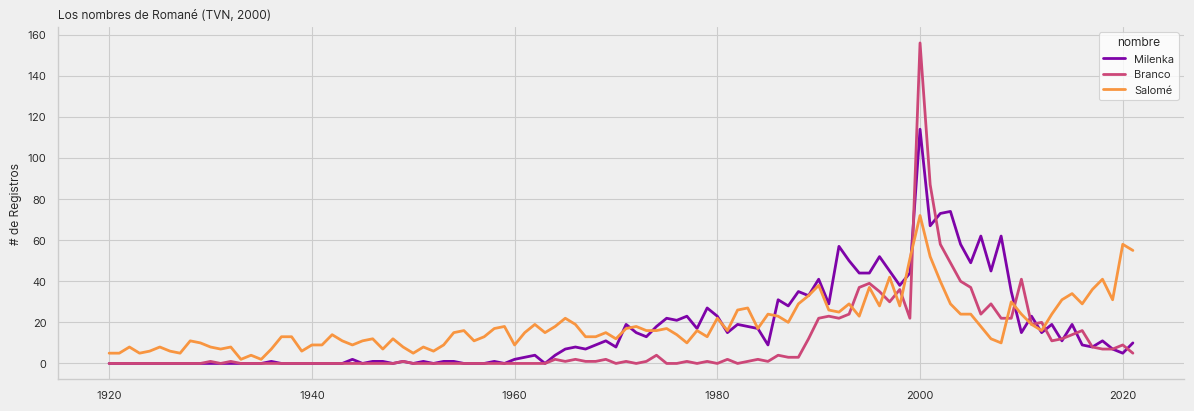

In [32]:
fig, ax = plot_nameseries(tabla_completa[["Milenka", "Branco", "Salomé"]].fillna(0))

ax.set_title("Los nombres de Romané (TVN, 2000)", loc="left")


Text(0.0, 1.0, "Everybody (Backstreet's Back)")

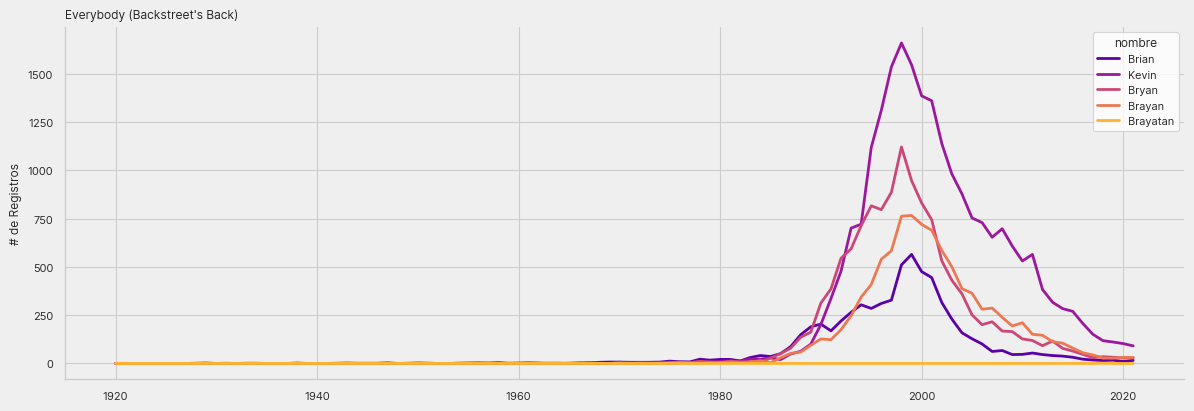

In [33]:
fig, ax = plot_nameseries(tabla_completa[["Brian", "Kevin", "Bryan", "Brayan", "Brayatan"]].fillna(0))
ax.set_title("Everybody (Backstreet's Back)", loc="left")


## ¿Hay tendencias en el tiempo que abarcan los nombres?

$$H = - \sum p_i \log p_i$$

In [34]:
from scipy.stats import entropy

entropia = (
    tabla_anual
    .fillna(0)
    .apply(entropy)
    .sort_values(ascending=False)
)

entropia


nombre
Ismael      4.573738
Laura       4.564593
Octavio     4.563057
Exequiel    4.556844
Elisa       4.554436
              ...   
Matheo      2.320354
Liam        2.252419
Benjamin    2.234782
Santino     2.150944
Noah        2.108277
Length: 901, dtype: float64

In [35]:
tabla_anual.idxmax()

nombre
Aaron       2011
Aarón       2019
Abel        1990
Abelardo    1956
Abigail     1990
            ... 
Zunilda     1955
Álvaro      1981
Ámbar       2019
Ítalo       1990
Úrsula      1982
Length: 901, dtype: int64

In [36]:
tabla_entropia = (
    tabla_anual.idxmax().rename("anio").to_frame().join(entropia.rename("entropia"))
)

tabla_entropia

,anio,entropia
nombre,,
Aaron,2011,3.869706
Aarón,2019,2.727979
Abel,1990,4.509048
Abelardo,1956,4.266573
Abigail,1990,3.901559
...,...,...
Zunilda,1955,4.167331
Álvaro,1981,4.213292
Ámbar,2019,3.351717


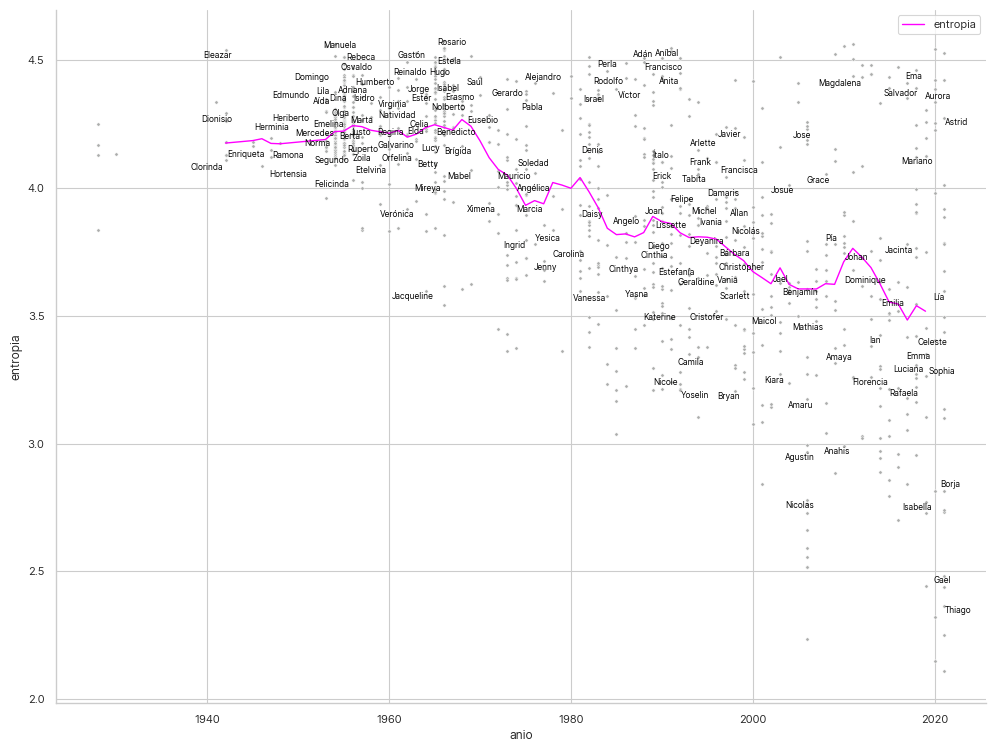

In [37]:
from aves.visualization.tables import scatterplot

fig, ax = plt.subplots(figsize=(12, 9))

scatterplot(
    ax,
    tabla_entropia,
    "anio",
    "entropia",
    annotate=False,
    avoid_collisions=False,
    label_args=dict(fontsize="xx-small"),
    scatter_args=dict(marker=".", color="#abacab"),
)

tabla_entropia.groupby("anio").mean().rolling(6, center=True).mean().plot(
    ax=ax, color="magenta", linewidth=1
)

scatterplot(
    ax,
    tabla_entropia.sample(150),
    "anio",
    "entropia",
    annotate=True, avoid_collisions=True,
    label_args=dict(fontsize='x-small', color='black'),
    scatter_args=dict(alpha=0)
)

## ¿Hay nombres _unisex_? ¿Qué tan _unisex_ son? ¿Cuáles son?

In [38]:
unisex_names = (
    pd.pivot_table(guaguas, index="nombre", columns="sexo", values="n", aggfunc="sum")
    .join(total_n)
    .fillna(0)
    .assign(mult=lambda x: x["F"] * x["M"])
    .pipe(lambda x: x[(x["mult"] > 0) & (x["n"] > 100)])
    .drop(["mult", "n"], axis=1)
    .pipe(normalize_rows)
    .pipe(lambda x: x[x["F"].between(0.015, 0.985)])
    .join(total_n)
)

unisex_names#.sort_values('n')


,F,I,M,n
nombre,,,,
Abiel,0.041379,0.0,0.958621,145
Adison,0.065041,0.0,0.934959,123
Adonay,0.057554,0.0,0.942446,139
Adonis,0.015782,0.0,0.984218,697
Akemi,0.967320,0.0,0.032680,153
...,...,...,...,...
Yuli,0.974359,0.0,0.025641,117
Yulian,0.070588,0.0,0.929412,340
Yuri,0.312018,0.0,0.687982,1814


<Axes: ylabel='Frequency'>

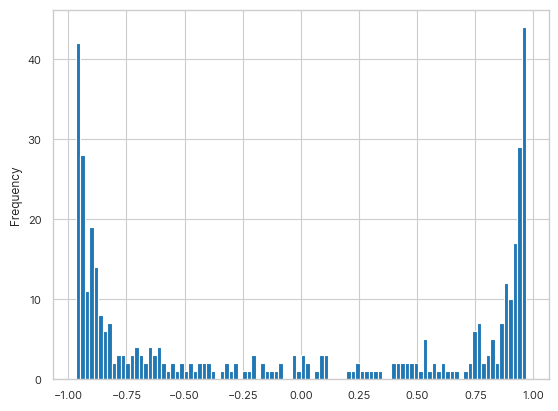

In [39]:
unisex_names["tendency"] = unisex_names["F"] - unisex_names["M"]
unisex_names["tendency"].plot(kind="hist", bins=100)


In [40]:
from aves.visualization.tables.bubbles import bubble_plot

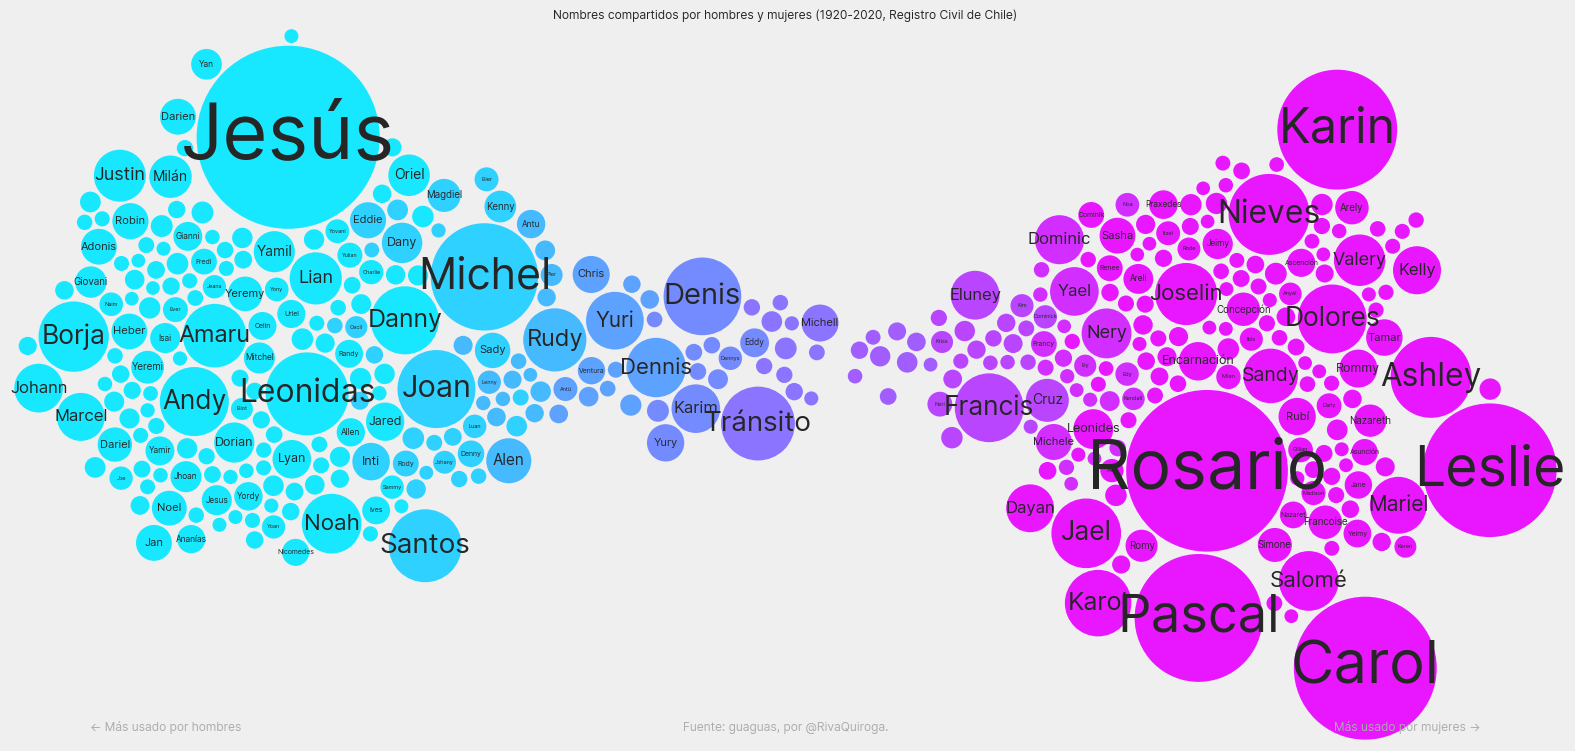

In [41]:
fig, ax = plt.subplots(figsize=(16, 9))

bubble_plot(
    ax,
    unisex_names.reset_index(),
    "tendency",
    "n",
    label_column="nombre",
    palette="cool",
    max_label_size=56,
    starting_y_range=60,
    margin=2,
)

ax.set_axis_off()
ax.set_title(
    "Nombres compartidos por hombres y mujeres (1920-2020, Registro Civil de Chile)"
)
ax.annotate(
    "Más usado por mujeres →",
    (0.95, 0.01),
    xycoords="axes fraction",
    ha="right",
    va="bottom",
    fontsize="medium",
    color="#abacab",
)
ax.annotate(
    "← Más usado por hombres",
    (0.05, 0.01),
    xycoords="axes fraction",
    ha="left",
    va="bottom",
    fontsize="medium",
    color="#abacab",
)
ax.annotate(
    "Fuente: guaguas, por @RivaQuiroga.",
    (0.5, 0.01),
    xycoords="axes fraction",
    ha="center",
    va="bottom",
    fontsize="medium",
    color="#abacab",
)

fig.set_facecolor("#efefef")
fig.tight_layout()